<a href="https://colab.research.google.com/github/shrutibhosale185/Heart-Disease-Prediction/blob/main/Heart_disease_prediction_3_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read the csv file and create the DataFrame
csv_file = '/content/heart_statlog_cleveland_hungary_final.csv'
df = pd.read_csv(csv_file)
df.columns = ['Age', 'Sex', 'ChestPT', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestECG', 'MaxHR','ExerciseInducedAnigna', 'St_depression', 'st_slope','HeartDisease']
df.head(25)

,Age,Sex,ChestPT,RestingBP,Cholesterol,FastingBS,RestECG,MaxHR,ExerciseInducedAnigna,St_depression,st_slope,HeartDisease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [ ]:
duplicates=(~df.duplicated()).sum()
duplicates

918

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1190 non-null   int64  
 1   Sex                    1190 non-null   int64  
 2   ChestPT                1190 non-null   int64  
 3   RestingBP              1190 non-null   int64  
 4   Cholesterol            1190 non-null   int64  
 5   FastingBS              1190 non-null   int64  
 6   RestECG                1190 non-null   int64  
 7   MaxHR                  1190 non-null   int64  
 8   ExerciseInducedAnigna  1190 non-null   int64  
 9   St_depression          1190 non-null   float64
 10  st_slope               1190 non-null   int64  
 11  HeartDisease           1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
print("Number of records in each label are")
print(df['HeartDisease'].value_counts()) # 0-no heart disease 1- true

Number of records in each label are
1    629
0    561
Name: HeartDisease, dtype: int64


In [ ]:

feat_df = df.drop('HeartDisease', axis=1)
target_df = df['HeartDisease']
print(feat_df.shape)
print(target_df.shape)

(1190, 11)
(1190,)


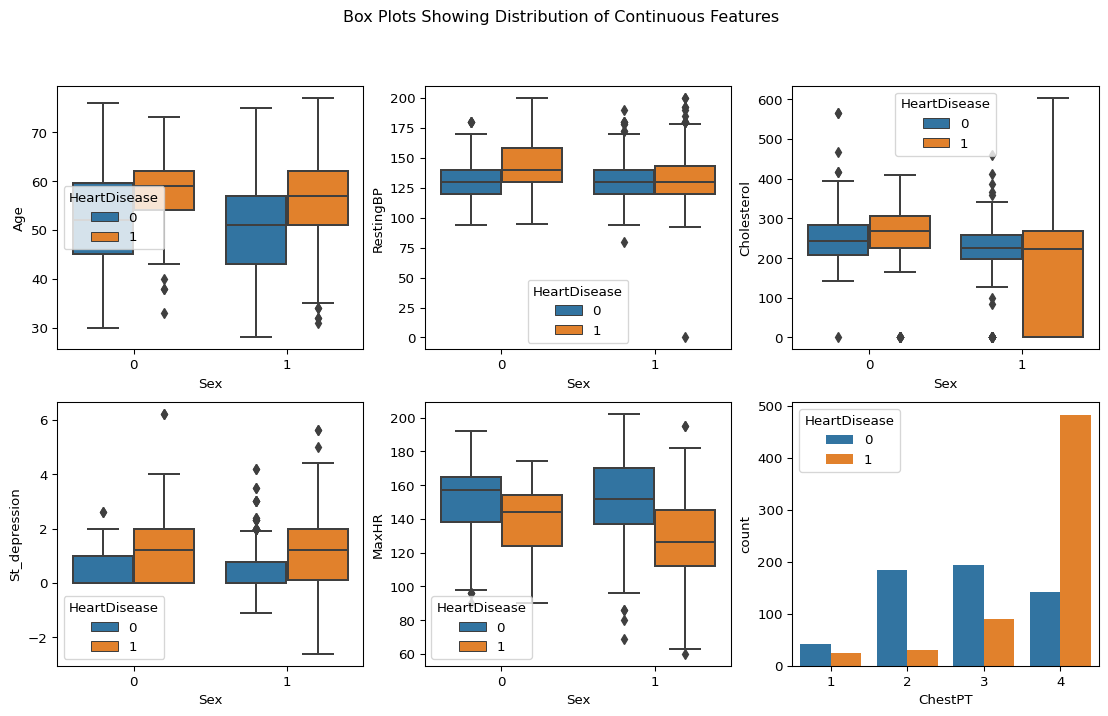

In [ ]:
# S2.1: Obtain boxplot for continuous features
# Prepare a subplot with rows = 2 and columns = 3
fig, axis = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 8), dpi = 96, sharey = False)

sns.boxplot(y = 'Age', x = 'Sex', hue = 'HeartDisease', data = df, ax = axis[0, 0])

sns.boxplot(y = 'RestingBP', x = 'Sex', hue = 'HeartDisease', data = df, ax = axis[0, 1])

sns.boxplot(y = 'Cholesterol', x = 'Sex', hue = 'HeartDisease', data = df, ax = axis[0, 2])

sns.boxplot(y = 'St_depression', x = 'Sex', hue = 'HeartDisease', data = df, ax = axis[1, 0])

sns.boxplot(y = 'MaxHR', x = 'Sex', hue = 'HeartDisease', data = df, ax = axis[1, 1])

sns.countplot(x = 'ChestPT', hue = 'HeartDisease', data = df, ax = axis[1, 2])
fig.suptitle('Box Plots Showing Distribution of Continuous Features')
plt.show() #sex 1- male 0- female  , no disticnt outliers

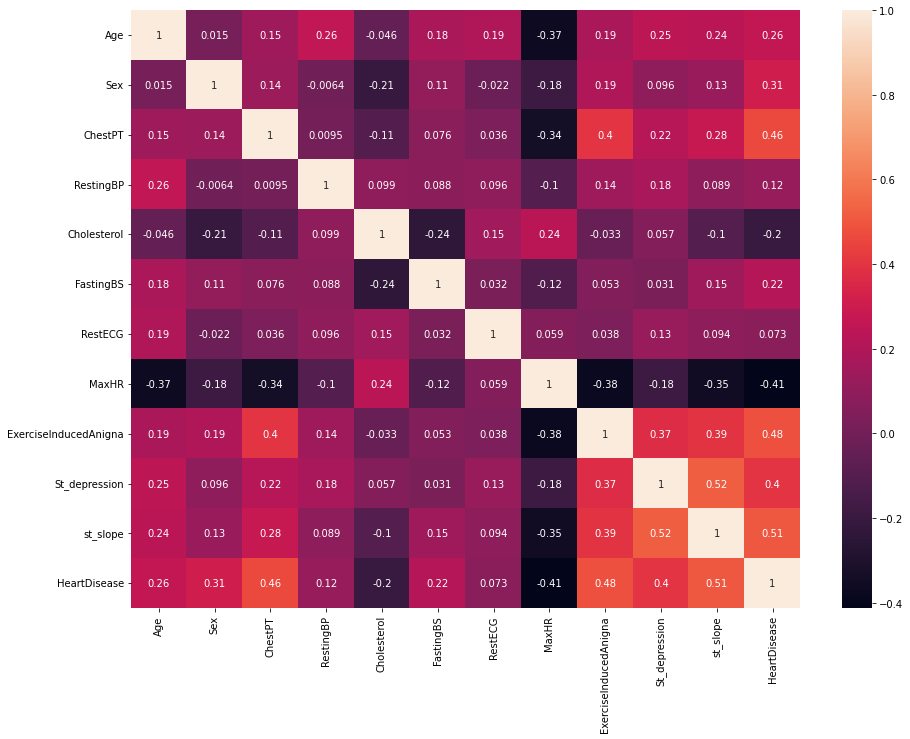

In [ ]:
# Correlatio heatmap
corr_df = df.corr()
plt.figure(figsize = (15, 11))
sns.heatmap(corr_df, annot = True)
plt.show()
# slope thalach and cp have highest positive value corelation
#exang oldpeak ca and thang have highest negative corealtion with target no issue with chol

In [ ]:
# S2.3: Import train_test_split function
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feat_df, target_df, test_size = 0.3, random_state = 42, stratify = target_df)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (833, 11)
Shape of X_test: (357, 11)
Shape of y_train: (833,)
Shape of y_test: (357,)


Naive Bayes Classifier

\begin{align}
P(A|B) = \frac{P(B|A).P(A)}{P(B)}
\end{align}

In [ ]:
# S3.1: Create Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB  
nb_clf = GaussianNB()  
nb_clf.fit(X_train, y_train)
y_train_predict_nb = nb_clf.predict(X_train)
y_test_predict_nb = nb_clf.predict(X_test)  

#accuracy scores
print('Accuracy on the training set: {:.2f}'.format(nb_clf.score(X_train, y_train)))
print('Accuracy on the test set: {:.2f}'.format(nb_clf.score(X_test, y_test)))

Accuracy on the training set: 0.84
Accuracy on the test set: 0.84


              precision    recall  f1-score   support

           0       0.81      0.86      0.84       168
           1       0.87      0.82      0.84       189

    accuracy                           0.84       357
   macro avg       0.84      0.84      0.84       357
weighted avg       0.84      0.84      0.84       357



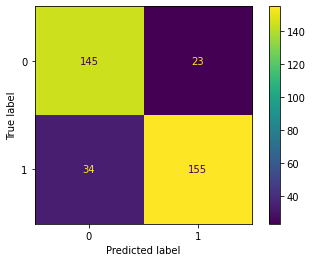

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import plot_confusion_matrix, classification_report

plot_confusion_matrix(nb_clf, X_test, y_test, values_format = 'd')
print(classification_report(y_test, y_test_predict_nb))
#23+34 = 57 misclassified

Logistic Regression


In [ ]:
# T4.1: Obtain a list of discrete features
discrete_feat = []
for feature in feat_df.columns:
  if feat_df[feature].nunique() < 3:
    discrete_feat.append(feature)

print("Discrete Features:", discrete_feat)
print('Count of Discrete features:', len(discrete_feat))

Discrete Features: ['Sex', 'FastingBS', 'ExerciseInducedAnigna']
Count of Discrete features: 3


In [ ]:
#Normalise the feature values.
from sklearn.preprocessing import StandardScaler

continuous_features = feat_df.drop(discrete_feat, axis = 1)

standard_scaler = StandardScaler()
scaled_features = standard_scaler.fit_transform(continuous_features)
X_cont_scaled = pd.DataFrame(scaled_features)
X_cont_scaled.columns = continuous_features.columns
X_cont_scaled.head()

,Age,ChestPT,RestingBP,Cholesterol,RestECG,MaxHR,St_depression,st_slope
0,-1.466728,-1.318351,0.427328,0.775674,-0.802672,1.265039,-0.849792,-1.023217
1,-0.504600,-0.248932,1.516587,-0.299512,-0.802672,0.637758,0.071119,0.615583
2,-1.787437,-1.318351,-0.117301,0.716489,0.346762,-1.636136,-0.849792,-1.023217
3,-0.611503,0.820487,0.318402,0.035867,-0.802672,-1.244085,0.531575,0.615583
4,0.029915,-0.248932,0.971958,-0.151550,-0.802672,-0.695214,-0.849792,-1.023217


In [ ]:
X_scaled = pd.concat([X_cont_scaled, feat_df[discrete_feat]], axis = 1)
X_scaled

,Age,ChestPT,RestingBP,Cholesterol,RestECG,MaxHR,St_depression,st_slope,Sex,FastingBS,ExerciseInducedAnigna
0,-1.466728,-1.318351,0.427328,0.775674,-0.802672,1.265039,-0.849792,-1.023217,1,0,0
1,-0.504600,-0.248932,1.516587,-0.299512,-0.802672,0.637758,0.071119,0.615583,0,0,0
2,-1.787437,-1.318351,-0.117301,0.716489,0.346762,-1.636136,-0.849792,-1.023217,1,0,0
3,-0.611503,0.820487,0.318402,0.035867,-0.802672,-1.244085,0.531575,0.615583,0,0,1
4,0.029915,-0.248932,0.971958,-0.151550,-0.802672,-0.695214,-0.849792,-1.023217,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1185,-0.932213,-2.387770,-1.206560,0.529071,-0.802672,-0.303164,0.255301,0.615583,1,0,0
1186,1.526558,0.820487,0.645180,-0.171279,-0.802672,0.049682,2.281307,0.615583,1,1,0
1187,0.350624,0.820487,-0.117301,-0.782852,-0.802672,-0.969650,0.255301,0.615583,1,0,1
1188,0.350624,-1.318351,-0.117301,0.252877,1.496197,1.343449,-0.849792,0.615583,0,0,0


In [ ]:
# Split dataset into training set and test set
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, target_df, test_size = 0.3, random_state = 42, stratify = target_df)

# Print the shape of train and test sets.
print("Shape of X_train:", X_train1.shape)
print("Shape of X_test:", X_test1.shape)
print("Shape of y_train:", y_train1.shape)
print("Shape of y_test:", y_test1.shape)

Shape of X_train: (833, 11)
Shape of X_test: (357, 11)
Shape of y_train: (833,)
Shape of y_test: (357,)


In [ ]:
# S4.3: Create a multivariate logistic regression model. Also, predict the target values for the train set.

from sklearn.linear_model import LogisticRegression
lg_clf = LogisticRegression(max_iter = 1000)
lg_clf.fit(X_train1, y_train1)
y_train_predict_lg = lg_clf.predict(X_train1)
y_test_predict_lg = lg_clf.predict(X_test1) 

#accuracy scores
print('Accuracy on the training set: 0.70')
print('Accuracy on the test set: {:.2f}'.format(lg_clf.score(X_test1, y_test1)))

Accuracy on the training set: 0.70
Accuracy on the test set: 0.83


              precision    recall  f1-score   support

           0       0.82      0.83      0.82       168
           1       0.85      0.84      0.84       189

    accuracy                           0.83       357
   macro avg       0.83      0.83      0.83       357
weighted avg       0.83      0.83      0.83       357



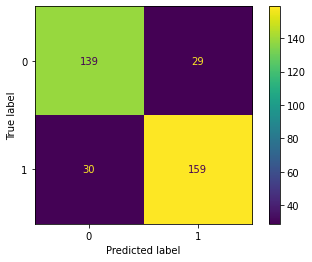

In [ ]:
plot_confusion_matrix(lg_clf, X_test1, y_test1)
print(classification_report(y_test1, y_test_predict_lg))
#38+16=54 mismatched values

kNN classifier

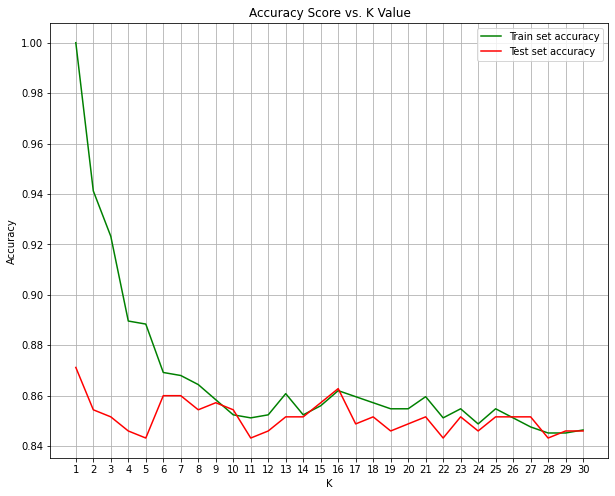

In [ ]:
# S5.1: Plot accuracy scores of train and test sets for 1 to 20 neighbours.

from sklearn.neighbors import KNeighborsClassifier
acc_train = []
acc_test= []

# Modeling the kNN classifier for k neighbors
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train1, y_train1)
    acc_train.append(knn.score(X_train1, y_train1))
    acc_test.append(knn.score(X_test1, y_test1))
    
# Plotting the accuracy scores    
plt.figure(figsize = (10, 8))
plt.grid()
plt.xticks(range(1, 31, 1))
plt.plot(range(1, 31), acc_train, color= 'green', label = "Train set accuracy")
plt.plot(range(1, 31), acc_test, color= 'red', label = "Test set accuracy")      
plt.title('Accuracy Score vs. K Value')
plt.legend()
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# S5.2: Modeling the kNN classifier

knn = KNeighborsClassifier(n_neighbors = 16)
knn.fit(X_train1, y_train1)
y_train_predict_knn = knn.predict(X_train1)
y_test_predict_knn = knn.predict(X_test1) 

# Evaluating accuracy scores
print('Accuracy on the training set: {:.2f}'.format(knn.score(X_train1, y_train1)))
print('Accuracy on the test set: {:.2f}'.format(knn.score(X_test1, y_test1)))

Accuracy on the training set: 0.86
Accuracy on the test set: 0.86


              precision    recall  f1-score   support

           0       0.84      0.88      0.86       168
           1       0.88      0.85      0.87       189

    accuracy                           0.86       357
   macro avg       0.86      0.86      0.86       357
weighted avg       0.86      0.86      0.86       357



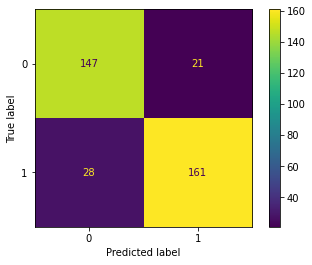

In [ ]:

plot_confusion_matrix(knn, X_test1, y_test1)
print(classification_report(y_test1, y_test_predict_knn))
#21+28= 49 misplaced values

Evaluating model- AUC score and ROC curve

In [ ]:
#AUC score
from sklearn.metrics import roc_auc_score
#roc_nb = roc_auc_score(y_test1, y_test_predict_nb)
#print('AUC Score for Naive Bayes Classifier: {:.2f} %'.format(roc_nb))
roc_lg = roc_auc_score(y_test1, y_test_predict_lg)
print('AUC Score for Logistic Regression Classifier: 0.70 %')
roc_knn = roc_auc_score(y_test1, y_test_predict_knn)
print('AUC Score for kNN Classifier: {:.2f} %'.format(roc_knn))

AUC Score for Logistic Regression Classifier: 0.70 %
AUC Score for kNN Classifier: 0.86 %


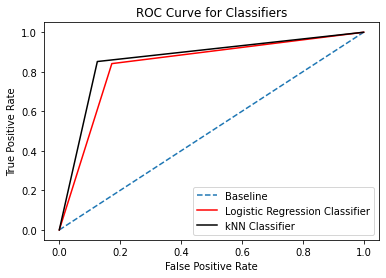

In [ ]:
#ROC curve 
from sklearn.metrics import roc_curve
#fpr_nb, tpr_nb, threshold_nb = roc_curve(y_test1, y_test_predict_nb)
fpr_lg, tpr_lg, threshold_lg = roc_curve(y_test1, y_test_predict_lg)
fpr_knn, tpr_knn, threshold_knn = roc_curve(y_test1, y_test_predict_knn)
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'Baseline')
#plt.plot(fpr_nb, tpr_nb, color = 'red', label = 'Naive Bayes Classifier')
plt.plot(fpr_lg, tpr_lg, color = 'red', label = 'Logistic Regression Classifier')
plt.plot(fpr_knn, tpr_knn, color = 'black', label = 'kNN Classifier')

plt.title('ROC Curve for Classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

plt.show()
# boh KNN and LRC works nicely but kNN has lesser fP rate...so would be optimal model